# Deep Learning complete exercise

In this exercise, a study will be carried out on customer churn in a communications company. Customer churn occurs when customers or subscribers stop doing business with a company or finish having services with it. Measuring customer churn is critical for companies because it is much less expensive to retain existing customers than to acquire new customers (since the process of attracting new customers requires the use of marketing and sales resources to be carried out successfully). Customer retention, on the other hand, is generally more profitable, because you have already earned the trust and loyalty of existing customers.

Predictive analytics uses behavior prediction models that predict customer churn, by assessing their propensity or risk of churn. These models are especially effective in designing marketing strategies aimed at retaining potential defectors, that is, those customers who are most vulnerable to leave.

The data set has been obtained from: https://www.kaggle.com/ntnu-testimon/paysim1. It contains information about the company's customers that includes:

* Clients who are related to the company along with those who have left the company in the last month. It is represented by a binary value that indicates whether the client has left or not, called Churn.
* Services that a client has contracted. It includes the telephone line or multiple lines, internet service, online security, online data backup, device protection, technical support, streaming television and streaming movie service.
* Information on the client's account, such as type of contract, payment method, time the client has been with the company, type of billing, monthly charges and total charges applied to the client during their contract.
* Demographic information of the client, that is, gender, if they have a partner, or if they have dependents and if they are retired.

The objective is to try to predict if the customer will leave the company, it is to predict the exit of the Churn field. An Exploratory Data Analysis (EDA) of the data will be carried out, the most relevant fields will be analyzed and different supervised algorithms will be tested to try to predict the Churn variable.

### 1. Loading the data
First of all, we proceed to import the data and find out what columns are in the csv

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('telco-churn.csv')

In [3]:
# Initial exploration
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Columns
print(dataset.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


The different columns that appear correspond to:

* **customerID** - customer identification number.
* **gender** - customer's gender, indicates whether the customer is male or female (Male, Female).
* **SeniorCitizen** - binary value that indicates whether the customer is a senior or not (1, 0).
* **Partner** - binary value that indicates if the customer has a partner or not (Yes, No).
* **Dependents** - binary value that indicates whether the customer has dependents or not (Yes, No).
* **tenure** - number of months that the client has been with the company.
* **PhoneService** - binary value that indicates if the client has telephone service or not (Yes, No).
* **MultipleLines** - categorical value that indicates if the client has multiple telephone lines or not, or does not have telephone service (Yes, No, No phone service).
* **InternetService** - categorical value that indicates if the client has internet service and the type of service provided (DSL, Fiber optic, No).
* **OnlineSecurity** - categorical value that indicates whether the client has online security service or not, or does not have internet service (Yes, No, No internet service).
* **OnlineBackup** - categorical value that indicates if the client has online data backup service or not, or does not have internet service (Yes, No, No internet service).
* **DeviceProtection** - categorical value that indicates whether the client has device protection service or not, or does not have internet service (Yes, No, No internet service).
* **TechSupport** - categorical value that indicates if the client has contracted technical support service or not, or does not have internet service (Yes, No, No internet service).
* **StreamingTV** - categorical value that indicates whether the client has streaming television service or not, or does not have internet service (Yes, No, No internet service).
* **StreamingMovies** - categorical value that indicates whether the client has streaming movies service or not, or does not have internet service (Yes, No, No internet service).
* **Contract** - categorical value that indicates the type of customer's contract, monthly, annual, or biannual (Month-to-month, One year, Two year).
* **PaperlessBilling** - binary value that indicates whether the customer has digital billing or not (Yes, No).
* **PaymentMethod** - categorical value that indicates the method of payment of the customer's invoices, through electronic check, check by mail, automatic bank transfer and automatic charge to credit card (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
* **MonthlyCharges** - numerical value of the amount charged to the customer monthly.
* **TotalCharges** - numerical value of the total amount charged to the customer.
* **Churn** - binary value that indicates whether or not the client has left (Yes, No).

By analyzing this description of variables, we can know from the beginning which are continuous, which are non-ordinal categorical and which are ordinal categorical, and indicate each of them in lists.

Some binary variables, such as "Dependents", have a hierarchy, since Yes> No. Others, binary, such as Gender, do not.

We also leave those with "No internet service" among the non-ordinals, as their relationship to "No" is not clear as a hierarchy.

In [5]:
# Feature identification
list_cont = ['tenure', 'MonthlyCharges', 'TotalCharges']
list_ord = ['PhoneService', 'Dependents', 'Contract', 'InternetService', 'PaperlessBilling', 'Churn']
list_not_ord = [x for x in list(dataset.columns) if x not in list_cont + list_ord and x != 'customerID']

### 2. Exploratory Data Analysis (EDA)
As explained in the course, before building the model, it is convenient to study and investigate the data, explore them better and also verify the appearance of any relevant atypical observation that may affect the generality of the study.

#### 2.1. EDA Univariate

In [6]:
# Relevant information about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-7-5efee8ff1e56>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


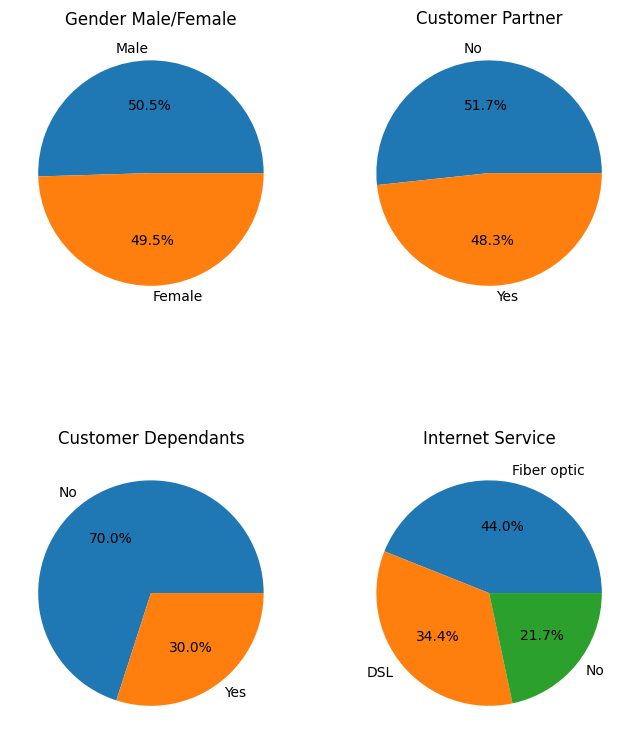

In [7]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))

# Gender
plt.subplot(2, 2, 1)
plt.title("Gender Male/Female")
feature_used = "gender"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Partner
plt.subplot(2, 2, 2)
plt.title("Customer Partner")
feature_used = "Partner"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')


# Dependents
plt.subplot(2, 2, 3)
plt.title("Customer Dependants")
feature_used = "Dependents"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# InternetService
plt.subplot(2, 2, 4)
plt.title("Internet Service")
feature_used = "InternetService"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

<ipython-input-8-08ec54994889>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


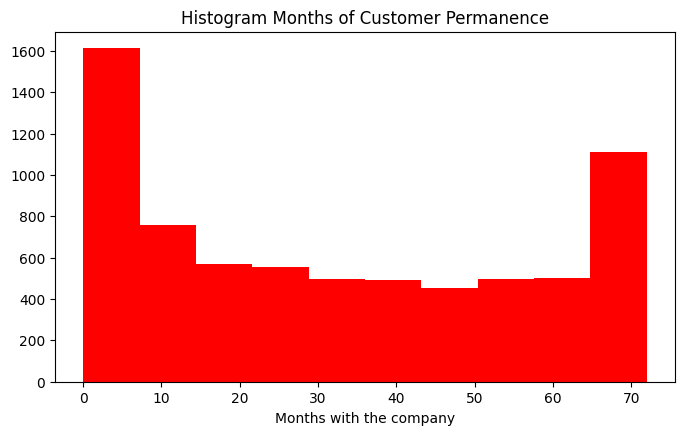

<ipython-input-8-08ec54994889>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


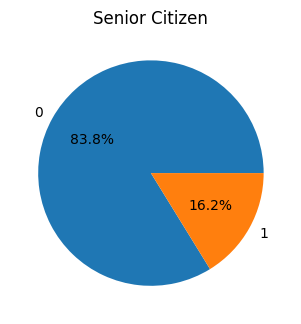

In [8]:
# Histogram charts
f, ax = plt.subplots(figsize=(8, 10))

# tenure
plt.subplot(2, 1, 1)
plt.hist(dataset['tenure'], color = 'red')
plt.title('Histogram Months of Customer Permanence')
plt.xlabel('Months with the company')

plt.show()

f, ax = plt.subplots(figsize=(8, 10))

# SeniorCitizen
plt.subplot(2, 2, 1)
plt.title('Senior Citizen')
feature_used = "SeniorCitizen"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Whether the customer is a senior citizen or not (1, 0)
plt.show()

In the histogram, it is observed that the number of customers who have been users of the company for less than 7 months (1612 customers) and customers who have more than 5 years (60 months) with the company (1109 customers) stand out. And of the customers that have internet service, the majority use DSL internet service (44%).

In the piechart, it is observed that Senior clients (Third Age) (83.8%) predominate over young people (16.2%).

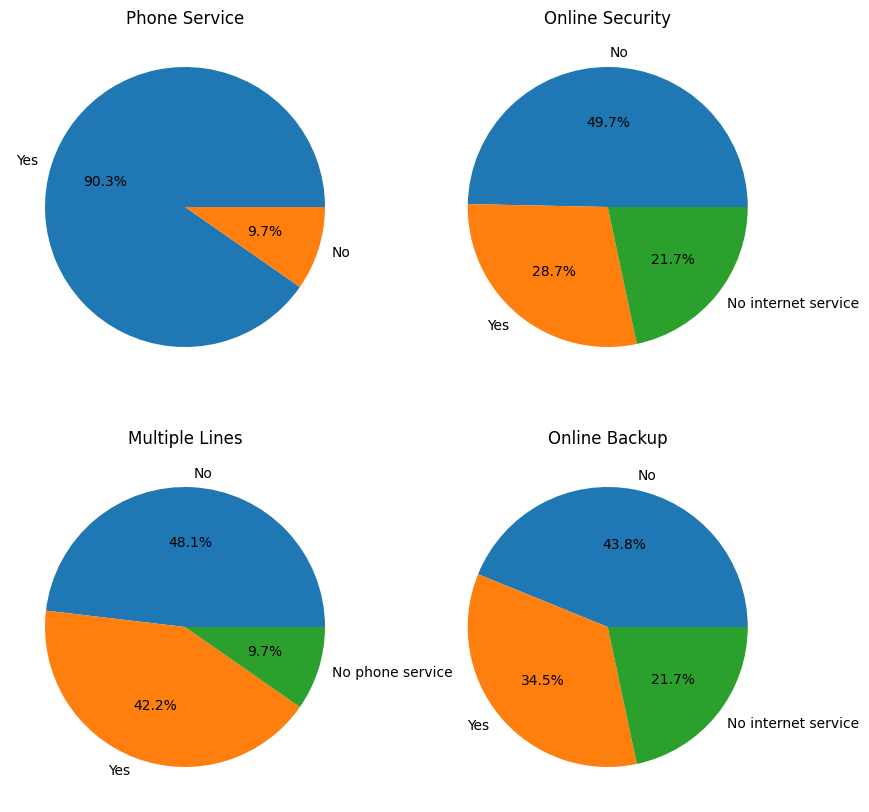

In [9]:
# Pie charts
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# PhoneService
plt.subplot(2, 2, 1)
plt.title("Phone Service")
feature_used = "PhoneService"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# OnlineSecurity
plt.subplot(2, 2, 2)
plt.title("Online Security")
feature_used = "OnlineSecurity"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# MultipleLines
plt.subplot(2, 2, 3)
plt.title("Multiple Lines")
feature_used = "MultipleLines"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# OnlineBackup
plt.subplot(2, 2, 4)
plt.title("Online Backup")
feature_used = "OnlineBackup"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

The graphs show that only 9.7% of customers do not have a telephone line service, and of this, 42.2% have multiple telephone lines.

On the other hand, it is observed with respect to the internet service that almost half of the sample of clients (49.7%) do not contract the online Security service, and likewise, a majority also do not contract the online data backup service (43.8 %), meaning they don't spend money to secure their data online, or to back up their data online.

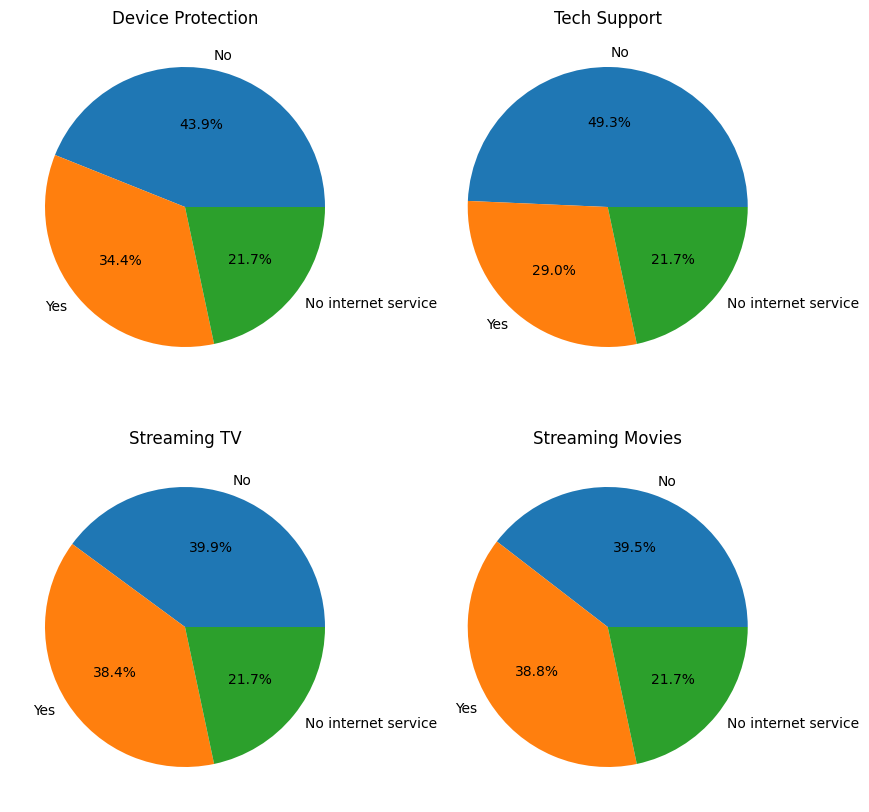

In [ ]:
# Pie charts
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# DeviceProtection
plt.subplot(2, 2, 1)
plt.title("Device Protection")
feature_used = "DeviceProtection"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# TechSupport
plt.subplot(2, 2, 2)
plt.title("Tech Support")
feature_used = "TechSupport"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# StreamingTV
plt.subplot(2, 2, 3)
plt.title("Streaming TV")
feature_used = "StreamingTV"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# StreamingMovies
plt.subplot(2, 2, 4)
plt.title("Streaming Movies")
feature_used = "StreamingMovies"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

In the pie charts it is observed with respect to the internet service that again, almost half of the sample of clients (43.9% and 49.3% respectively) does not contract either the Device Protection service or the technical support service

On the other hand, it is observed with respect to the internet service that 38.4% of the sample of clients that has this streaming television service and 38.8% of the clients contract the streaming movie service.

<ipython-input-14-6997545ada6d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
<ipython-input-14-6997545ada6d>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


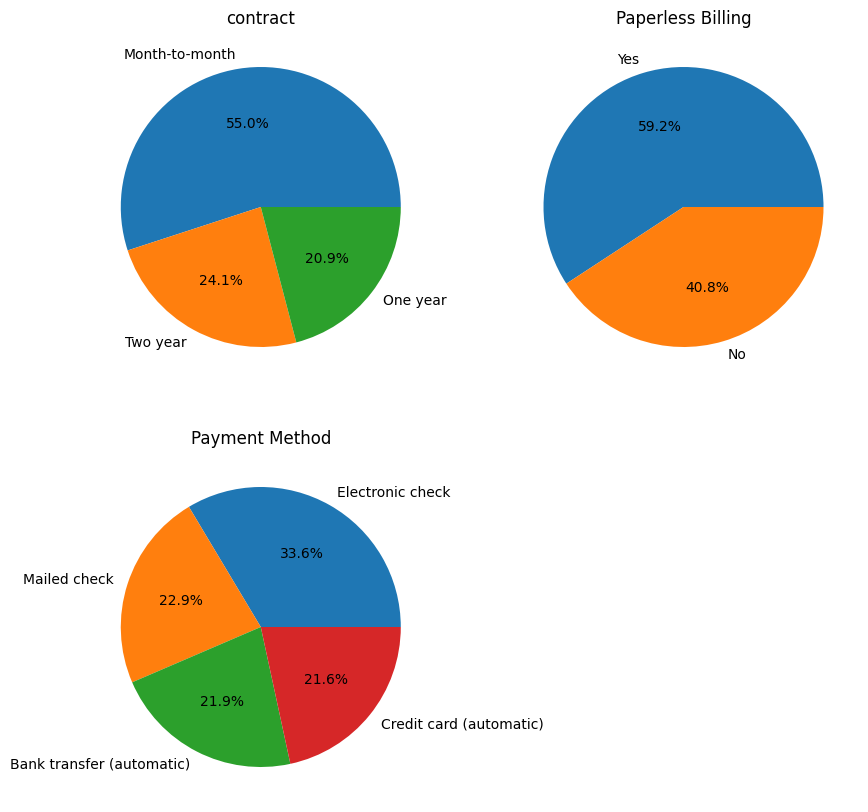

In [ ]:
# Pie charts
f, ax = plt.subplots(2, 1, figsize=(10, 10))

# Contract
plt.subplot(2, 2, 1)
plt.title("contract")
feature_used = "Contract"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# PaperlessBilling
plt.subplot(2, 2, 2)
plt.title("Paperless Billing")
feature_used = "PaperlessBilling"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

# Contract
plt.subplot(2, 2, 3)
plt.title("Payment Method")
feature_used = "PaymentMethod"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')

plt.show()

In the pie charts it is observed with respect to the type of client contract, that more than half of the sample (55%) have a monthly payment contract. Similarly, the majority of customers (59.2%) prefer digital, paperless billing. And finally, the payment methods available to the client are used in practically the same percentages, with a small preference for payment by electronic check.

<ipython-input-15-d061b5ddc044>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


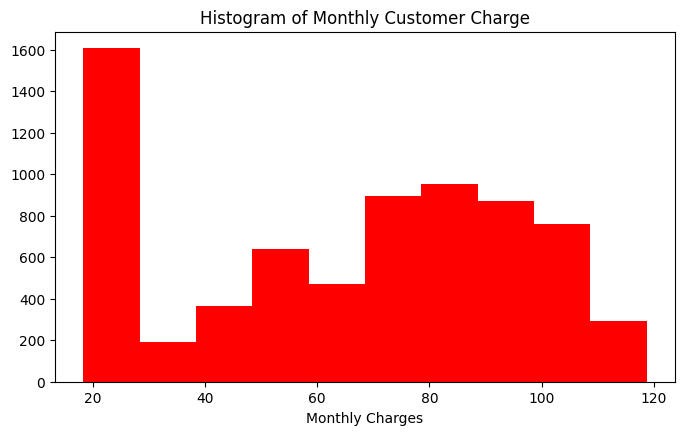

In [ ]:
# Histogram charts
f, ax = plt.subplots(figsize=(8, 10))

# MonthlyCharges
plt.subplot(2, 1, 1)
plt.hist(dataset['MonthlyCharges'], color = 'red')
plt.title('Histogram of Monthly Customer Charge')
plt.xlabel('Monthly Charges')

plt.show()

In the histogram of monthly customer charge, it is observed that a striking number of customers, that is, 1606 customers (almost 23%) have monthly charges of less than $ 30.

When the feature "TotalCharges" is analyzed, it is observed that it is of type 'Object'. But examining the data and according to the description of this feature, which expresses that it is the total charge of money charged to the customer, it is concluded that this field should be of type decimal or 'float'. Therefore, this column in the dataset must be converted to a value of type numeric. But the values of this feature for certain clients are empty in the dataset, therefore an error would be generated when performing the conversion.

In [10]:
# TotalCharges is of 'Object' datatype. Looking at the data set it should be of 'float' data type
# Convert 'TotalCharges' to numeric data type
# pd.to_numeric(dataset['TotalCharges'])
# ValueError: Unable to parse string " " at position 488.

dataset.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

By replacing the blank spaces in "TotalCharges" with the value 0, in those clients that do not have information in this layer, it prepares the data to be able to convert this field to a numeric type, successfully.

It is not always a good idea to replace null values with 0, since in a case like this we are implying that these clients do not have total charges, and we are generating records that are inconsistent with the reality of the data. Still, for this example, we're going to replace it with 0 for convenience. The ideal would be to replace it with another value, such as the mean, so that they do not impact the model (or discard them).

In [11]:
# The error is because of whitespace in the 'TotalCharges' column. If there is a missing observation pandas would have filled
# with NaN but since there is a whitespace character the entire feature is converted to string data type.
dataset = dataset.replace(" ", 0)
# See if the data is complete or is there any NaN
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#convert to float type
# Convert 'TotalCharges' to numeric data type
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [13]:
# We make a copy of the dataset with the original variables for later analysis
dataset1 = dataset.copy()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<ipython-input-14-99264a816869>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


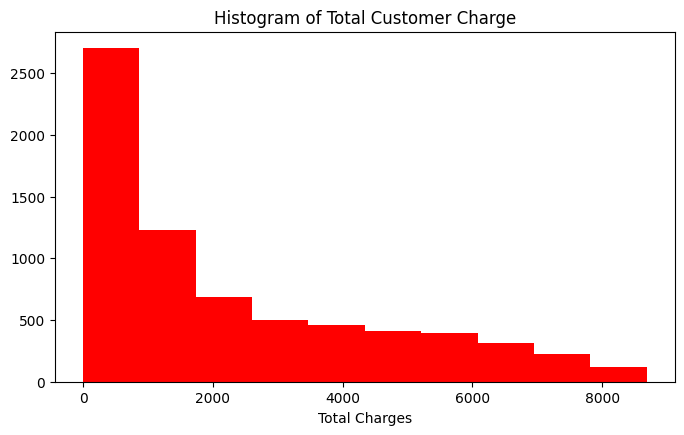

In [14]:
# Histograms charts
f, ax = plt.subplots(figsize=(8, 10))

# TotalCharges
plt.subplot(2, 1, 1)
plt.hist(dataset['TotalCharges'], color = 'red')
plt.title('Histogram of Total Customer Charge')
plt.xlabel('Total Charges')

plt.show()

After transforming the "TotalCharges" field to a numeric type field, the histogram is displayed and the data is analyzed, noting that most of the customers have a low average total charges.

<ipython-input-15-241feccc3adc>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


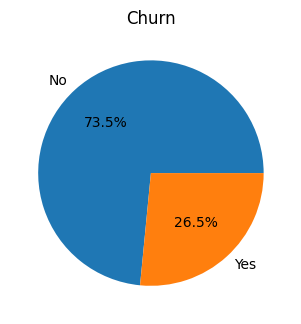

In [15]:
# Churn
f, ax = plt.subplots(figsize=(8, 10))

# SeniorCitizen
plt.subplot(2, 2, 1)
plt.title('Churn')
feature_used = "Churn"
sums = dataset[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')
plt.show()

# describes a typical use case of prediction, churn or abandon; the idea is to use the available entities to be able to
# predict when a customer will or will not leave the company, in this case a Telco. The variable to predict would be the Churn field

At this point, the "Churn" field is analyzed, which is the variable to predict and it is observed that for this sample of clients 26.5% of them leave the company, the idea is to find patterns in the other characteristics of the clients that allow predicting that the client will defect.

#### 2.2. Data pre-processing

Now, we have to transform the data before we can generate the neural network (NN) model. This implies transforming categorical variables to numeric variables in order to work with them. At this point, after doing a first analysis of the data, it can be clearly seen that the "CustomerID" field is a variable that is used to identify each customer, but it has no relevance when it comes to predicting the churn of a client, so we can drop this column from here on.

For some variables, such as InternetService, we do a manual encoding since being ordinal categorical variables (No service <DSL <Fiber) we want the order to be maintained.

In [16]:
dataset.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [17]:
# Remembering the columns by type
print("Continuous features", list_cont)
print("Ordinal categorical features", list_ord)
print("Non-ordinal categorical  features", list_not_ord)

Continuous features ['tenure', 'MonthlyCharges', 'TotalCharges']
Ordinal categorical features ['PhoneService', 'Dependents', 'Contract', 'InternetService', 'PaperlessBilling', 'Churn']
Non-ordinal categorical  features ['gender', 'SeniorCitizen', 'Partner', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


In [18]:
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None) # To see every column

# Create a dataset with the encodings
dataset2 = dataset.copy()

# Manual encoding of ordinal variables to maintain hierarchy
dataset2["Churn"] = dataset2["Churn"].replace(['No', 'Yes'],[0, 1])
dataset2["PhoneService"] = dataset2["PhoneService"].replace(['No', 'Yes'],[0, 1])
dataset2["Contract"] = dataset2["Contract"].replace(['Month-to-month', 'One year', 'Two year'],[0, 1, 2])
dataset2["InternetService"] = dataset2["InternetService"].replace(['No', 'DSL', 'Fiber optic'],[0, 1, 2])
dataset2["PaperlessBilling"] = dataset2["PaperlessBilling"].replace(['No', 'Yes'],[0, 1])
dataset2["Dependents"] = dataset2["Dependents"].replace(['No', 'Yes'],[0, 1])

# One Hot encoding for non-ordinal variables
enc = OneHotEncoder(drop='first')
df_aux = pd.DataFrame(enc.fit_transform(dataset2[list_not_ord]).toarray())
df_aux.columns = enc.get_feature_names_out(list_not_ord)
df_aux['customerID'] = dataset2['customerID']

# Join with original dataframe after removing columns from encoding
dataset2 = dataset2.drop(columns=list_not_ord)
dataset2 = dataset2.merge(df_aux, left_on=['customerID'], right_on=['customerID']).drop(columns=['customerID'])

dataset2.head()

,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,34,1,1,1,0,56.95,1889.50,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,1,1,0,1,53.85,108.15,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,45,0,1,1,0,42.30,1840.75,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,1,2,0,1,70.70,151.65,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2.3 Bivariate EDA
At this point, before generating the model, all customer characteristics must be analyzed looking for patterns that relate these characteristics to the Churn variable. In addition, we neet to verify whether these variables are independent or correlated and finally verifying that they really have an influence on the variable to be predicted.

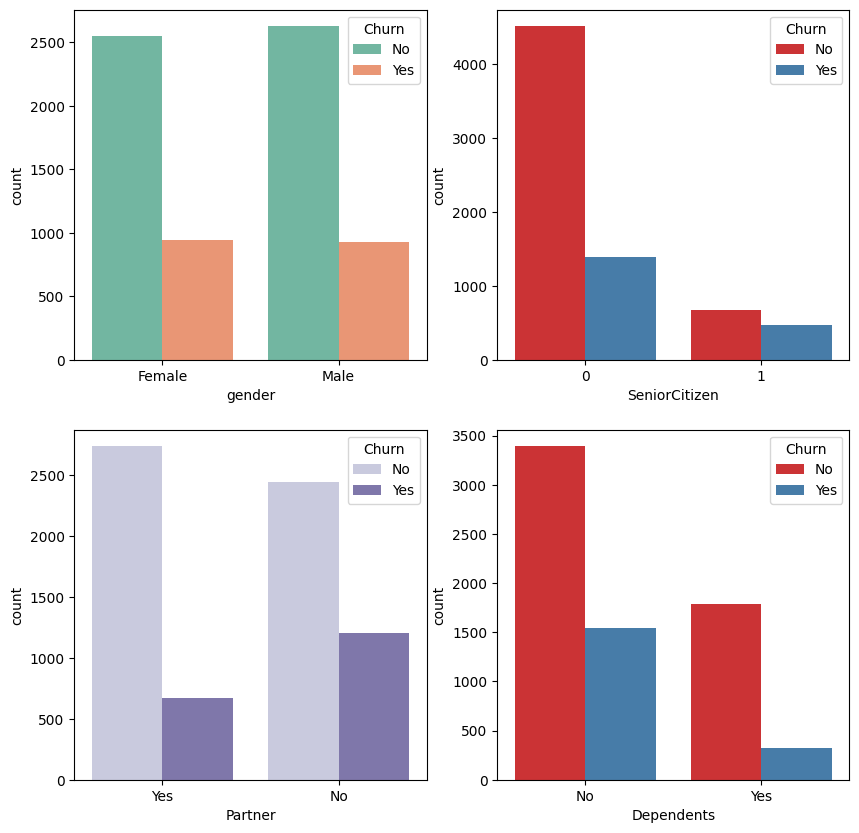

In [19]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# Churn vs. gender
plt.subplot(2, 2, 1)
sns.countplot(x="gender",hue="Churn",data=dataset1, palette="Set2")

# Churn vs. SeniorCitizen
plt.subplot(2, 2, 2)
sns.countplot(x="SeniorCitizen",hue="Churn",data=dataset1, palette="Set1")

# Countplot
# Churn vs. Partner
plt.subplot(2, 2, 3)
sns.countplot(x="Partner",hue="Churn",data=dataset1, palette="Purples")

# Churn vs. Dependents
plt.subplot(2, 2, 4)
sns.countplot(x="Dependents",hue="Churn",data=dataset1,palette="Set1")
plt.show()

The histogram on gender shows that the dropout percentage is almost the same in the case of men and women. We can't see a real gender impact on customer churn.

In the histogram on Senior clients, it is observed that the percentage of abandonment is almost double in the case of elderly people. Older people seem less loyal customers, because while senior citizens are only 16.2% of customers, they have a much higher churn rate: 42% versus 23% for younger customers.

Analyzing the histograms of clients with a partner and clients with dependents, it is seen that these clients with a partner and dependents have a lower churn rate compared to those who do not have these traits. Thus, apparently, clients who are single and dependent are more likely to drop out. Clients with a partner and dependents seem more loyal.

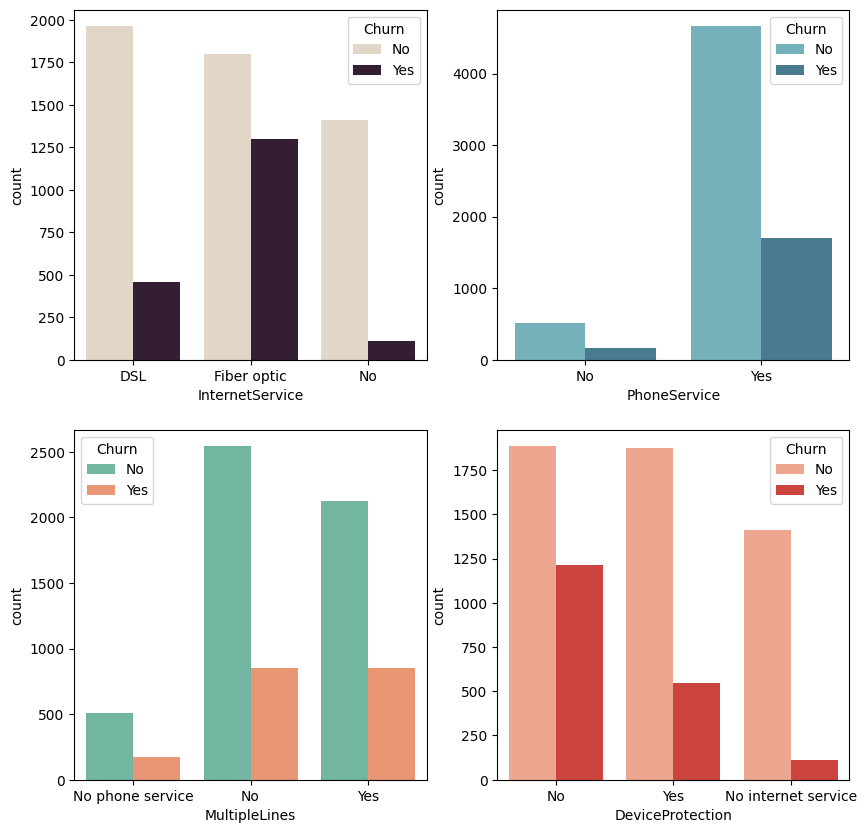

In [20]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# Countplot
plt.subplot(2, 2, 1)
# Churn vs. InternetService
sns.countplot(x="InternetService",hue="Churn",data=dataset1, palette="ch:.25")

# Churn vs. PhoneService
plt.subplot(2, 2, 2)
sns.countplot(x="PhoneService",hue="Churn",data=dataset1,palette="GnBu_d")

# Countplot
plt.subplot(2, 2, 3)
# Churn vs. MultipleLines
sns.countplot(x="MultipleLines",hue="Churn",data=dataset1, palette="Set2")

# Churn vs. DeviceProtection
plt.subplot(2, 2, 4)
sns.countplot(x="DeviceProtection",hue="Churn",data=dataset1,palette="Reds")
plt.show()

In the internet service histogram, it can be seen that the churn rate is much higher in the case of Fiber Optic Internet services than those with a DSL connection. This could be because this type of internet connection, although it is true is of better quality, is also more expensive than the DSL connection.

In the histogram of telephone service, it is observed that there are very few clients who do not contract telephone service. And of those who have this service, if the histogram of customers who have multiple phone lines is analyzed, it can be seen that the churn rate is higher in the customers who hire them. Needless to say, customers who don't have multiple lines seem more loyal.

Analyzing the device protection service histogram, it is observed that customers who do not contract this service have a higher churn rate compared to those who do enjoy this service. Users with a contracted device protection service seem more loyal.

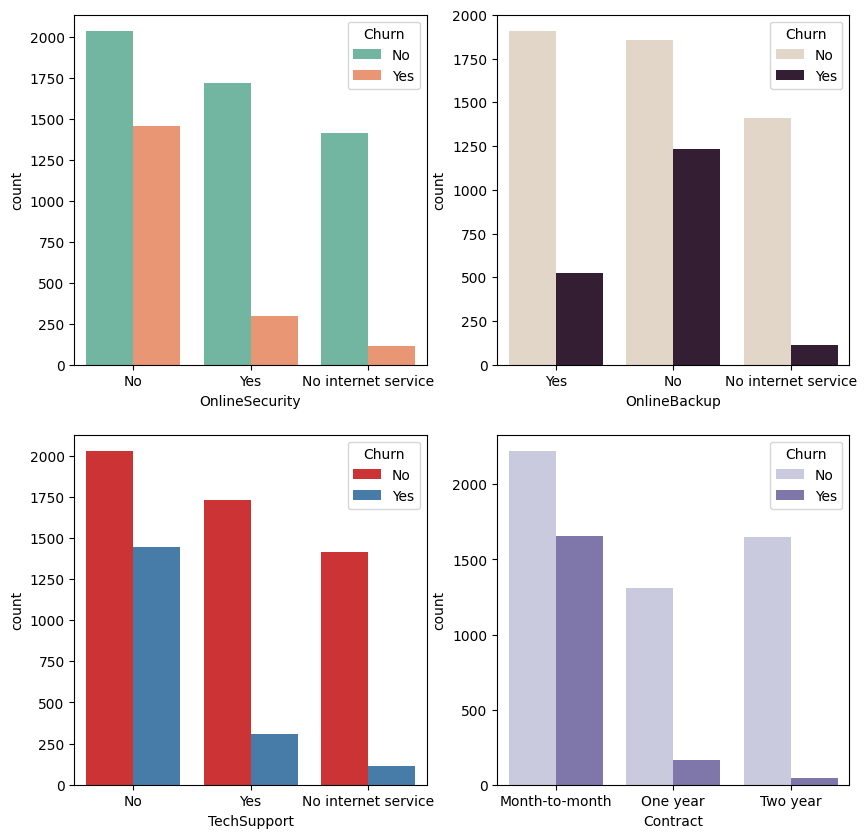

In [21]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# Countplot
# Churn vs. OnlineSecurity
plt.subplot(2, 2, 1)
sns.countplot(x="OnlineSecurity",hue="Churn",data=dataset1, palette="Set2")

# Churn vs. OnlineBackup
plt.subplot(2, 2, 2)
sns.countplot(x="OnlineBackup",hue="Churn",data=dataset1,palette="ch:.25")

# Churn vs. TechSupport
plt.subplot(2, 2, 3)
sns.countplot(x="TechSupport",hue="Churn",data=dataset1, palette="Set1")

# Churn vs. Contract
plt.subplot(2, 2, 4)
sns.countplot(x="Contract",hue="Churn",data=dataset1,palette="Purples")
plt.show()

The histograms for online security service, online data backup, and technical support show that customers without these services have a very high churn rate. Therefore, customers who do not opt for technical support, online security, and online data backup have a better chance of leaving.

Analyzing the contract histogram, it is observed that a high percentage of customers with a monthly subscription are more willing to leave, compared to customers with a one or two-year contract. This shows that clients who take a longer contract seem more loyal to the company and tend to stay with it for a longer period of time.

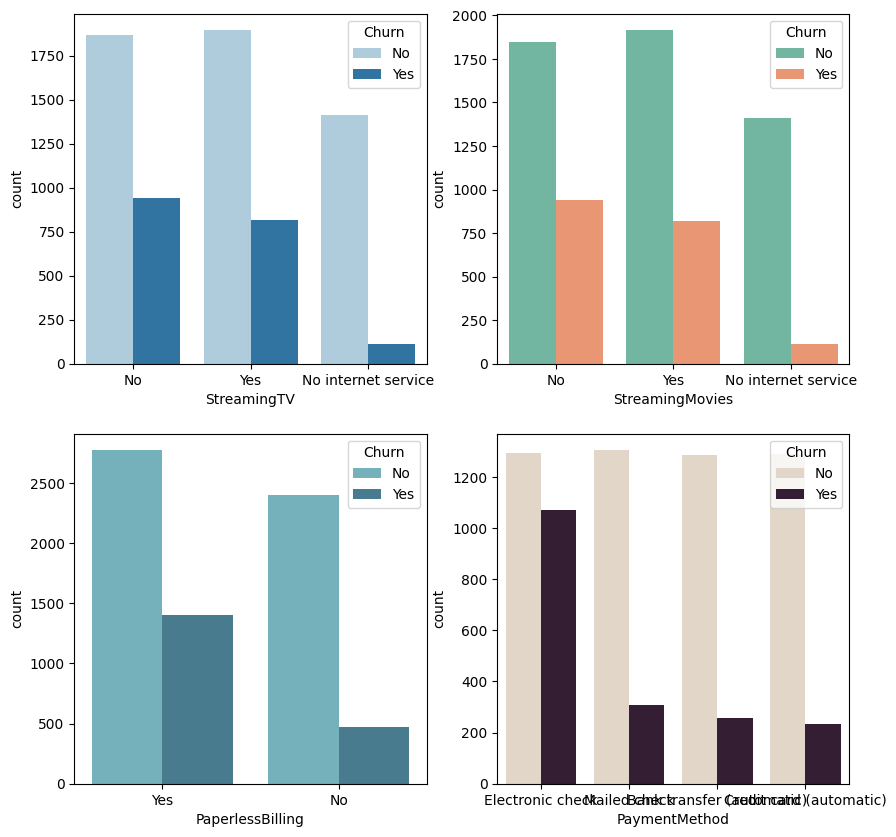

In [22]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

# Countplot
# Churn vs. StreamingTV
plt.subplot(2, 2, 1)
sns.countplot(x="StreamingTV",hue="Churn",data=dataset1, palette="Paired")

# Churn vs. StreamingMovies
plt.subplot(2, 2, 2)
sns.countplot(x="StreamingMovies",hue="Churn",data=dataset1,palette="Set2")

# Countplot
# Churn vs. PaperlessBilling
plt.subplot(2, 2, 3)
sns.countplot(x="PaperlessBilling",hue="Churn",data=dataset1, palette="GnBu_d")

# Churn vs. PaymentMethod
plt.subplot(2, 2, 4)
sns.countplot(x="PaymentMethod",hue="Churn",data=dataset1,palette="ch:.25")
plt.show()

In the histograms of streaming TV service and streaming movies, it can be seen that, in customers who do not have these services, the churn rate is higher compared to customers who do opt for these services. Therefore, customers with streaming TV service and streaming movies seem more loyal.

In the digital billing histogram, it is observed that the churn percentage is higher in the case of customers who have the electronic billing option.

Analyzing the contract histogram, it is discovered that a high percentage of customers who use the electronic check as a payment method tend to abandon the platform more than other options.

<ipython-input-30-a21e38c6427d>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
<ipython-input-30-a21e38c6427d>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


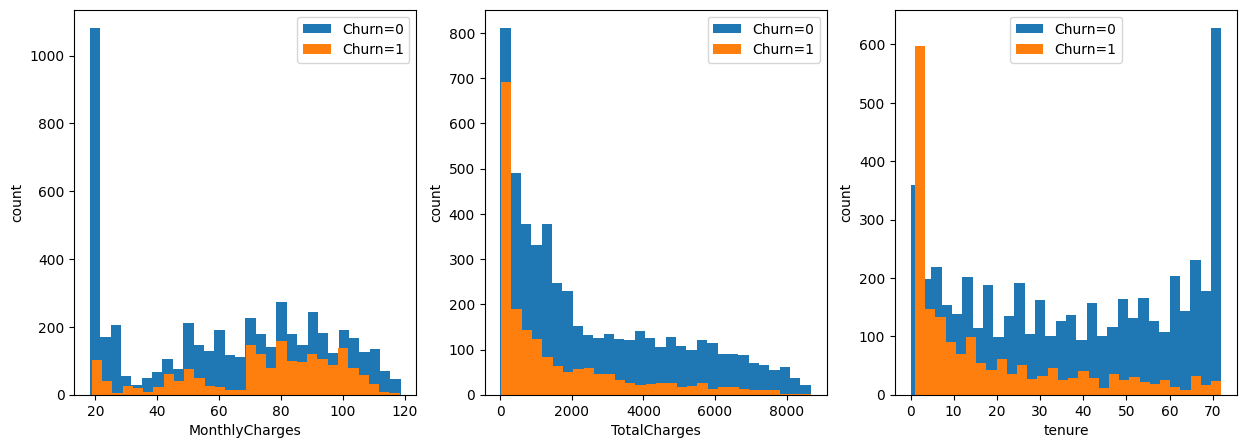

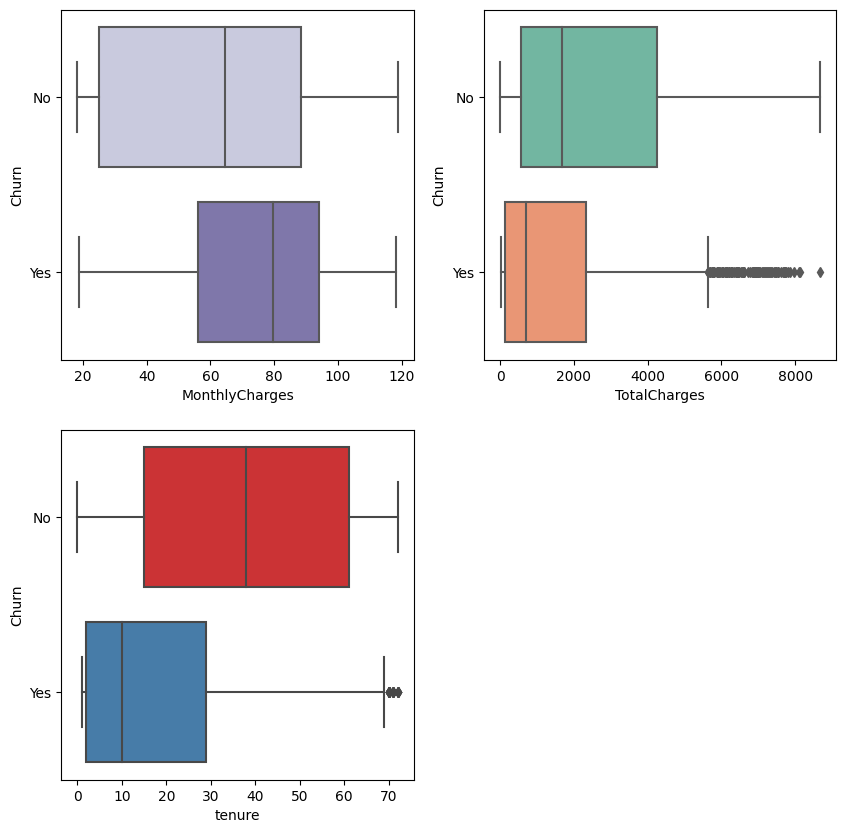

In [ ]:
df = dataset1[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']]
continues_var=[i for i in df.columns if df[i].dtypes !='object']
fig , ax = plt.subplots(1,3,figsize=(15,5))
for i , x in enumerate(continues_var):
    ax[i].hist(df[x][df.Churn=='No'],label='Churn=0',bins=30)
    ax[i].hist(df[x][df.Churn=='Yes'],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

# Boxplot
f, ax = plt.subplots(2, 1, figsize=(10, 10))
# Churn vs. MonthlyCharges
plt.subplot(2, 2, 1)
sns.boxplot(x="MonthlyCharges",y="Churn",data=dataset1, palette="Purples")
# Churn vs. MonthlyCharges
plt.subplot(2, 2, 2)
sns.boxplot(x="TotalCharges",y="Churn",data=dataset1, palette="Set2")
# Churn vs. tenure
plt.subplot(2, 2, 3)
sns.boxplot(x="tenure",y="Churn",data=dataset1, palette="Set1")
plt.show()

In the charts about monthly charges, customers with churn have high monthly charges. The mean is greater than 75.
The number of customers with monthly charges below 25 is extremely high, however the churn rate for these customers is low. For customers with monthly charges greater than $ 30, the churn and non-churn distributions are similar.

In the graphs about total customer charges, it is observed that the average of the total charges of customers with churn is low. It is interesting to note in the graph of monthly charges, that users with lower charges per month appear to have lower churn rates. However, in the graph of total charges, users with lower charges appear to have a higher churn rate.

Analyzing the graphs of permanence in the platform (tenure) it is discovered that, the average permanence for customers who left was around 10 months (this is clearly observed in the boxplot). The tenure distributions are very different between customers who left and those who did not. For customers who left the company, the distribution is positively skewed, which means that customers who leave are more likely to cancel the service in the first couple of months. For clients who didn't quit, there are two peaks. The first reflects that there is a high number of customers with less than 7 months on the platform, and the second peak that is much more drastic than the first, and means that a large number of customers have been using the service for more than 5 years. Therefore, users with more permanence in the company seem more loyal than those with little time on the platform.

All these observations are supported both by the graphs set out above, and by the calculations below made on the fundamental metrics of the continuous variables, which are expressed in the table. Also with all this information about the data, it can be verified that there are no outliers in the continuous variables.

In [23]:
dataset_aux = dataset1[["gender", "SeniorCitizen", "Partner", "Dependents","tenure", "PhoneService", "MultipleLines",
                       "InternetService", "OnlineSecurity","OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                       "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges",
                        "TotalCharges", "Churn"]].copy()

dataset_aux['Churn'] = dataset_aux["Churn"].replace("No",np.nan)
dataset_aux.dropna()
dataset_aux = dataset_aux[dataset_aux["Churn"].notnull()]
dataset_aux = dataset_aux.reset_index()[dataset_aux.columns]

In [ ]:
dataset_aux.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


##### Correlations
Here we will only use ordinal categorical variables, along with continuous ones, using Spearman's method.

In [24]:
dataset1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

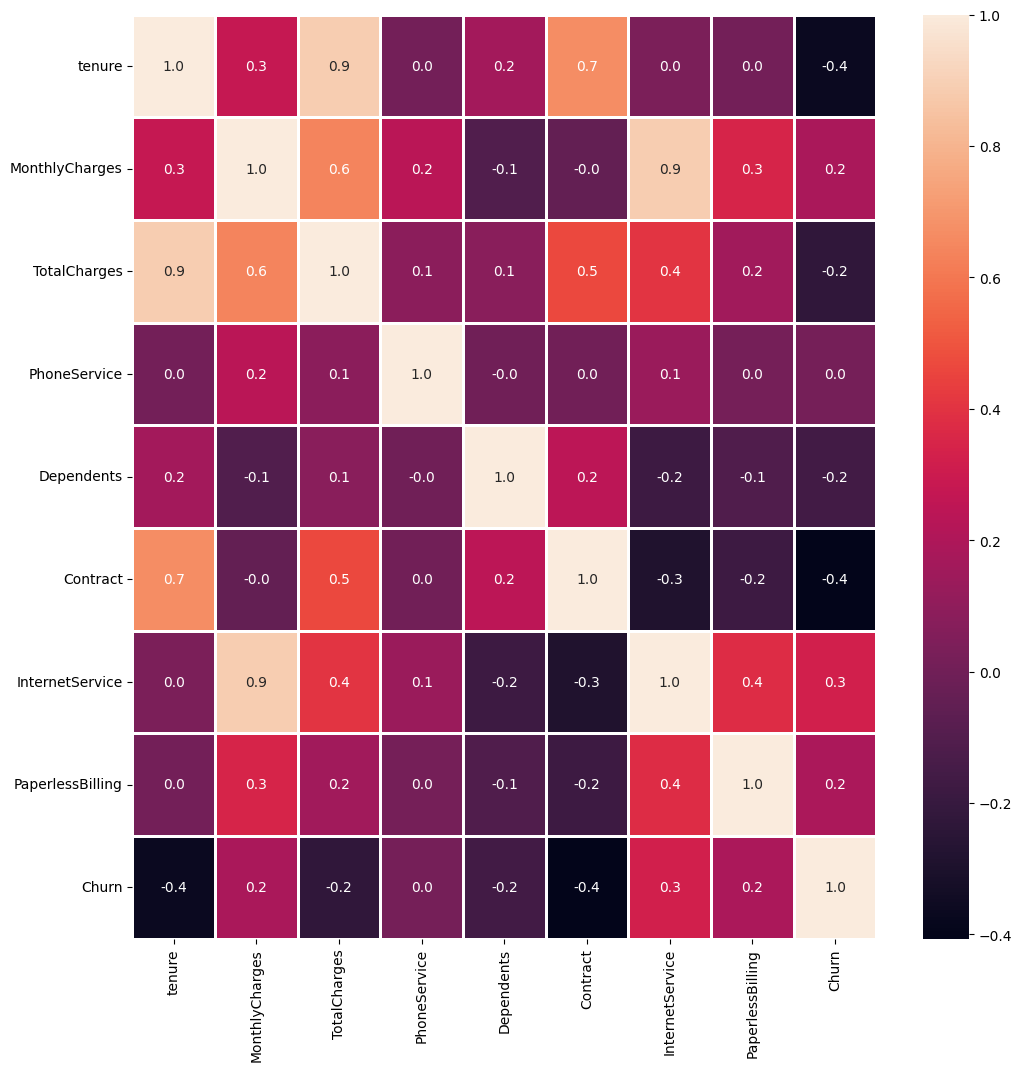

In [25]:
# Correlation between features
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset2[list_cont + list_ord].corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

As we can see, the permanence on the platform (tenure) and the total charges have a close correlation (0.9), which makes sense since the longer a client stays on the platform, the sum of their total expenses will be higher. In addition, total charges and monthly charges have a relevant correlation (0.6), and it is logical to think that if a customer increases his monthly expenses, the sum of his total expenses will be higher.

In the correlation charts, it is observed that the permanence on the platform (tenure) and the type of contract (Contract) also have a strong correlation (0.7). This is logical if it is thought that a contract determines the time that a client will enjoy a certain service, that is, it determines the permanence of it on the platform.

Regarding the Churn variable, it can be seen how there is a negative correlation of both Contract and Tenure; In other words, the longer the contract renewal period and the longer they have been with the company, the less likely they are to leave.
The other variables have some impact on the Churn but it is less. For example, it seems that among customers who leave, there is a little more presence of customers with internet services, while it would seem somewhat easier to retain those who do not have them.

As a last comment, the very high correlation of InternetService with MonthlyCharges (0.9)

#### Hypothesis tests for continuous variables
Alternatively, as the output variable is binary, we can do a Tukey test to see if there are differences between the mean values of the continuous variables for each output group (Churn, No Churn)

In [26]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

for column in list_cont:
    print("*"*100)
    print("Hypothesis contrast for {0} - Churn".format(column))
    MultiComp = MultiComparison(dataset1[column],
                                dataset1['Churn'])

    print(MultiComp.tukeyhsd().summary())
    print("*"*100)
    print()

****************************************************************************************************
Hypothesis contrast for tenure - Churn
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    No    Yes -19.5908   0.0 -20.8069 -18.3747   True
-----------------------------------------------------
****************************************************************************************************

****************************************************************************************************
Hypothesis contrast for MonthlyCharges - Churn
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  13.1762   0.0 11.6143 14.7381   True
---------------------------------------------------
********************************************************************************

For all cases, it is confirmed that there is a significant influence of these variables on the output.

#### Hypothesis tests for non-ordinal variables
To see the influence of the non-ordinal categorical input variables on the output (Churn), we use a hypothesis test analysis. To clearly see which variables appear in the analysis, we use the dataset without label encoding.

In [27]:
# Numerical encoding for Churn
dataset1["Churn"] = dataset1["Churn"].replace(['No', 'Yes'],[0, 1])

In [28]:
from statsmodels.stats.proportion import proportions_chisquare

for column in list_not_ord:
    print("*"*100)
    print("Hypothesis contrast for {0} - Churn".format(column))

    # Contingency table for this iteration
    a = dataset1['Churn']>0
    b = column
    df_cont = dataset1[['Churn', column]].groupby([a, b]).count()
    print(df_cont)

    # Hypothesis testing to see if there are significant differences between the number of data per group
    # with respect to this variable and the output
    (chi2, p, arr) = proportions_chisquare(count = df_cont[['Churn']], nobs = len(dataset1))

    print("P-valor: {0}".format(p))
    print("*"*100)
    print()

****************************************************************************************************
Hypothesis contrast for gender - Churn
              Churn
Churn gender       
False Female   2549
      Male     2625
True  Female    939
      Male      930
P-valor: 0.0
****************************************************************************************************

****************************************************************************************************
Hypothesis contrast for SeniorCitizen - Churn
                     Churn
Churn SeniorCitizen       
False 0               4508
      1                666
True  0               1393
      1                476
P-valor: 0.0
****************************************************************************************************

****************************************************************************************************
Hypothesis contrast for Partner - Churn
               Churn
Churn Partner       
False No        24

Making a hypothesis contrast like the previous one when there is so much imbalanced data in the categorical output can mask the results, since there would always be significant differences. In these cases, we can choose to make a hypothesis test between the categories of the input variables for each of the categories of the output, to see in which there are significant differences between the number of users per group.

In [29]:
from statsmodels.stats.proportion import proportions_chisquare

for column in list_not_ord:
    print("*"*100)
    print("Hypothesis contrast for {0} - Churn".format(column))

    # Contingency table for Churn==0
    df_aux = dataset1[dataset1['Churn']==0]
    a = df_aux['Churn']>0
    b = column
    df_cont = dataset1[['Churn', column]].groupby([a, b]).count()
    print(df_cont)

    # Hypothesis testing to see if there are significant differences between the number of data per group
    # with respect to this variable and the output
    (chi2, p, arr) = proportions_chisquare(count = df_cont[['Churn']], nobs = len(df_aux))
    print("P-valor (Churn = 0): {0}".format(p))

    # Contingency table for Churn==1
    df_aux = dataset1[dataset1['Churn']==1]
    a = df_aux['Churn']>0
    b = column
    df_cont = dataset1[['Churn', column]].groupby([a, b]).count()
    print(df_cont)

    # Hypothesis testing to see if there are significant differences between the number of data per group
    # with respect to this variable and the output
    (chi2, p, arr) = proportions_chisquare(count = df_cont[['Churn']], nobs = len(df_aux))
    print("P-valor (Churn = 1): {0}".format(p))

    print("*"*100)
    print()

****************************************************************************************************
Hypothesis contrast for gender - Churn
              Churn
Churn gender       
False Female   2549
      Male     2625
P-valor (Churn = 0): 0.13511737813348773
              Churn
Churn gender       
True  Female    939
      Male      930
P-valor (Churn = 1): 0.7684444714268481
****************************************************************************************************

****************************************************************************************************
Hypothesis contrast for SeniorCitizen - Churn
                     Churn
Churn SeniorCitizen       
False 0               4508
      1                666
P-valor (Churn = 0): 0.0
                     Churn
Churn SeniorCitizen       
True  0               1393
      1                476
P-valor (Churn = 1): 1.0697279645690459e-197
************************************************************************************

As we can see, gender does not seem to influence Churn. Nor does the payment method seem to influence users who do not do Churn.
For the rest of the cases, there seem to be significant differences, so these variables will be interesting to predict the output.

### 3. Artificial Neural Network (ANN).
At this point, we will proceed to implement the predictive model.

#### 3.1 Selection of variables, scaling and division of data.
The data set will be divided into a training and test set. The ANNs need the data to have similar magnitudes, so they are also standardized.

We use the previous dataset with labelencoding.

As an additional comment, since most of the variables have been seen to have some influence on the output (especially the non-ordinal categorical ones), we are going to choose to use them all. The only exception is that we are going to eliminate MonthlyCharges and TotalCharges because of their high correlations with other variables.

In [30]:
# Data Preparation

# Splitting the dataset into Training and Test Set
X = dataset2.drop(['Churn', 'MonthlyCharges', 'TotalCharges'],axis=1)
y = dataset2['Churn']

In [31]:
# Train/Test
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 3.2 Pipeline definition
To facilitate model evaluations, we define a function with all the steps that we want to perform, so that it is easier to try these models.

In [32]:
def pipeline_models(X_train, y_train, X_test, y_test, classifier, params={}):
    """
    Function that receives the training and test data, together with the object
    of the classification model to be trained and evaluated.

    Returns the already trained object.

    Parameters
    ----------
    X_train : TYPE
        DESCRIPTION.
    y_train : TYPE
        DESCRIPTION.
    X_test : TYPE
        DESCRIPTION.
    y_test : TYPE
        DESCRIPTION.
    classifier : TYPE
        DESCRIPTION.
    params : TYPE
        DESCPRiPTION

    Returns
    -------
    classifier : TYPE
        DESCRIPTION.

    """

    # Model training
    classifier.fit(X_train, y_train, **params)
    classifier.fit(X_train, y_train)

    # Output prediction
    y_pred = classifier.predict(X_test)

    # Cast to int
    y_pred = np.round(y_pred).astype('int')

    # Metrics
    score = classifier.evaluate(X_test, y_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.show()

    # Classification Report
    print(classification_report(y_test,y_pred))

    # ROC Curve
    fpr_ann,tpr_ann,_ann=roc_curve(y_test,y_pred)
    roc_auc=auc(fpr_ann,tpr_ann)

    # Now Draw ROC using fpr, tpr
    plt.plot([0, 1], [0, 1], 'k--',label='Random')
    plt.plot(fpr_ann,tpr_ann,label='ROC curve (area = %0.2f)' %roc_auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    return classifier

#### 3.3 ANN model.
Finally, the artificial neural network (ANN) model will be built. It will be designed with a hidden layer of 12 units, using the ReLU activation function and the output layer with a unit that uses a sigmoid function so that the data is expressed as a binary category. The cost function used will be the cross entropy for the binary case and an optimizer will be used that could be one of those previously seen, such as the SDG (stochastic gradient descent) method or the algorithm called Adam (Adaptive Moment Optimization), with 100 epochs .

In [33]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Model

In [34]:
from keras.layers import Dropout, Embedding, LSTM, Bidirectional
import tensorflow as tf

def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Function to create a NN for binary classification using 2 HL

    """

    # Initialising the ANN
    model = Sequential()

    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features,
                    kernel_initializer = 'normal',
                    activation = 'relu'))
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in,
                    kernel_initializer = 'normal',
                    activation = 'relu'))

    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out,
                    kernel_initializer = 'normal',
                    activation = 'sigmoid'))
    for i, layer in enumerate(model.layers):
        layer.set_weights(model.layers[i].get_weights())

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=lr,
      decay_rate=decay,
      decay_steps=5000
      )

    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

#### Configuration 1

In [35]:
# Parameters
n_features = np.shape(X_train)[1]
w_in = 40
w_h1 = 12
n_var_out = 1
batch_size = 20
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
classifier = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)

params = {'batch_size':batch_size,
          'epochs':nb_epochs,
          'validation_split':0.25}

Epoch 1/100
199/199 [==============================] - 2s 5ms/step - loss: 0.5183 - accuracy: 0.7470 - val_loss: 0.4101 - val_accuracy: 0.8138
Epoch 2/100
199/199 [==============================] - 1s 4ms/step - loss: 0.4334 - accuracy: 0.7922 - val_loss: 0.3990 - val_accuracy: 0.8153
Epoch 3/100
199/199 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7985 - val_loss: 0.3961 - val_accuracy: 0.8191
Epoch 4/100
199/199 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8031 - val_loss: 0.3965 - val_accuracy: 0.8176
Epoch 5/100
199/199 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8046 - val_loss: 0.3961 - val_accuracy: 0.8176
Epoch 6/100
199/199 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8051 - val_loss: 0.3975 - val_accuracy: 0.8191
Epoch 7/100
199/199 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8064 - val_loss: 0.4000 - val_accuracy: 0.8236

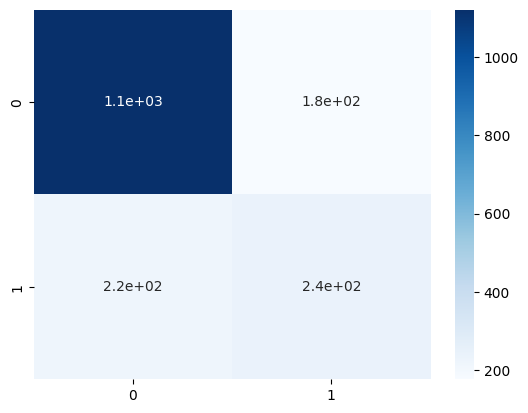

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1298
           1       0.58      0.52      0.55       463

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.77      0.77      1761



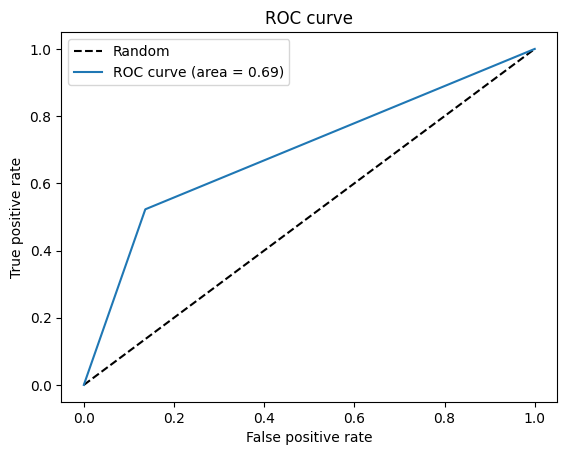

In [36]:
classifier = pipeline_models(X_train, y_train, X_test, y_test, classifier, params)

With the pipeline function, the model is trained and the predictions are generated.

We include other model evaluation metrics. First, we have the cost function, which in this case is the cross entropy, which is the appropriate function for this classification problem. It is observed that the value whose range must oscillate between 0 and 1 is located at 0.51 and seeing this value by itself, the metric shows a significant deviation, with which indicates that the model is not very efficient.

Regarding accuracy, which is the other metric generated at this point, which is the ratio between the number of correct predictions (both positive and negative) and the total number of predictions, it yields a value of 0.75, which would appear to be a fairly acceptable value, because it indicates that the predictions are 75% accurate, but as we know, there is a great imbalance in the data, and that is why using this metric is not appropriate, since it masks the results for the minority class.

Then the results are evaluated and a confusion matrix is obtained to see the correctly classified cases. In addition to the matrix, when evaluating the model we obtain the evaluation metrics, which in this case are the cost function and the precision of the model. Regarding the confusion matrix, it is observed that the predictions are quite correct in terms of customers who are loyal to the platform, the prediction of the model is correct for 1090 correctly classified cases against 208 cases incorrectly classified as loyal. On the other hand, in the case of defending users, the predictions seem quite inefficient, since 230 cases are calculated correctly, but there are almost the same number, 233 cases incorrectly calculated as clients on the run. In any case, the efficiency of the model is verified later with the evaluation metrics that will be seen below.

In the table of the "classification report" we see the metrics for each group, and it is verified how, indeed, the majority class (0) is predicted more or less well, while the minority not so much. This is a problem, since we need the model to be able to predict the Churn, but we see that it is not very efficient for it.

Finally, the ROC (reciever operating characteristic) curve is generated, which represents the true positive rate versus the false negative rate. These ROC curves leave a certain area under them, which is known as the area under the curve (AUC); the larger the area that approximates the perfect classification (up to the maximum of 1 in the case of the perfect model), the better the model. The line that divides the space in two would correspond to the reference of a model that classifies each class randomly (50% arbitrary probability of labeling with one class or another). In this way, any point that is below would correspond to a worse than random classification and would indicate a model that is not very good. In this case, the area under the curve is 0.68, a bit far from the value 1, far from being the perfect model, but at least it is well above the diagonal, so the model has its benefits and part of it is still possible adjust it to obtain a more efficient model.

Because of this, the model will be adjusted and its efficiency will be tested by changing the adjustment function, and instead of using the Adam algorithm (Adaptive Moment Optimization), the SDG (stochastic gradient descent) method will be used.

#### Configuration 2

In [37]:
# Parameters
n_features = np.shape(X_train)[1]
w_in = 40
w_h1 = 12
n_var_out = 1
batch_size = 20
nb_epochs = 100
optimizer = 'sgd'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
classifier = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)

params = {'batch_size':batch_size,
          'epochs':nb_epochs,
          'validation_split':0.25}

Epoch 1/100
199/199 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.7266 - val_loss: 0.6157 - val_accuracy: 0.7555
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7266 - val_loss: 0.5838 - val_accuracy: 0.7555
Epoch 3/100
199/199 [==============================] - 1s 3ms/step - loss: 0.5948 - accuracy: 0.7266 - val_loss: 0.5684 - val_accuracy: 0.7555
Epoch 4/100
199/199 [==============================] - 1s 3ms/step - loss: 0.5863 - accuracy: 0.7266 - val_loss: 0.5594 - val_accuracy: 0.7555
Epoch 5/100
199/199 [==============================] - 1s 3ms/step - loss: 0.5808 - accuracy: 0.7266 - val_loss: 0.5515 - val_accuracy: 0.7555
Epoch 6/100
199/199 [==============================] - 1s 4ms/step - loss: 0.5749 - accuracy: 0.7266 - val_loss: 0.5432 - val_accuracy: 0.7555
Epoch 7/100
199/199 [==============================] - 1s 4ms/step - loss: 0.5676 - accuracy: 0.7266 - val_loss: 0.5334 - val_accuracy: 0.7555

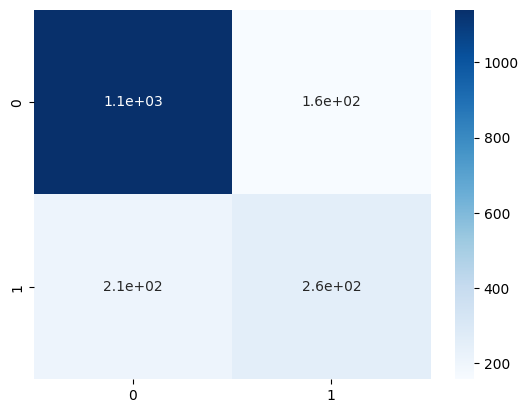

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1298
           1       0.62      0.55      0.58       463

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.79      0.79      1761



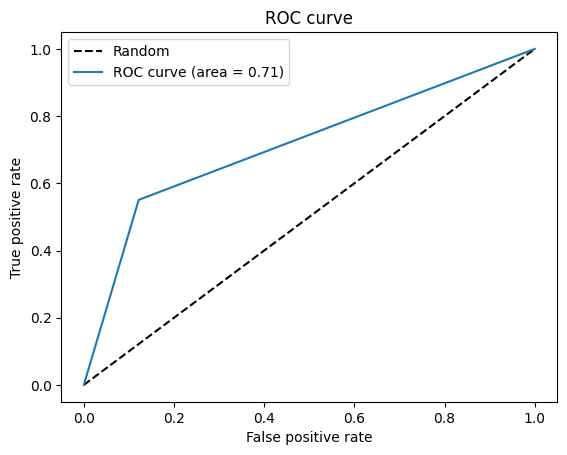

In [38]:
classifier = pipeline_models(X_train, y_train, X_test, y_test, classifier, params)

With this configuration, an improvement has been obtained both in the area of the ROC curve and in the F1 metric for the minority class. This is what interests us especially, since there is an improvement in the prediction of the users who will do Churn.